## Day 8

https://adventofcode.com/2022/day/8

In [1]:
import numpy as np

def parse08(filename):
    with open(filename) as f:
         return np.array([ [ int(n) for n in l.strip() ] for l in f.readlines() ])

In [2]:
def isVisible(i,j,grid):
    visT = sum([ 1 for t in grid[   :j,i] if t >= grid[j][i] ])==0 
    visB = sum([ 1 for t in grid[j+1: ,i] if t >= grid[j][i] ])==0 
    visL = sum([ 1 for t in grid[j,   :i] if t >= grid[j][i] ])==0 
    visR = sum([ 1 for t in grid[j,i+1: ] if t >= grid[j][i] ])==0
    return visT or visB or visL or visR

def countVisible(grid):
    visible = np.zeros(grid.shape,int)
    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            visible[j][i] = isVisible(i,j,grid)
    return sum(sum(visible)),visible

In [3]:
grid0 = parse08("data/test08.txt")
grid = parse08("data/input08.txt")

print("Test 1:",countVisible(grid0)[0])
sol1,visible=countVisible(grid)
print("Part 1:",sol1)

Test 1: 21
Part 1: 1840


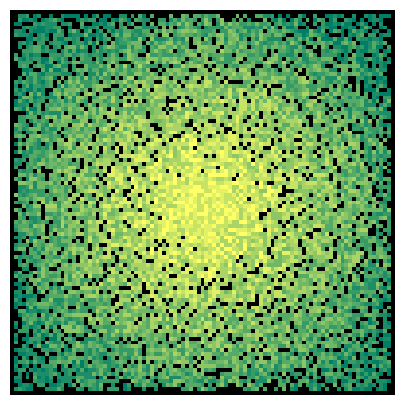

In [4]:
import matplotlib.pyplot as plt

# plot the tree heights
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.axis('off')
plt.imshow(grid,cmap="summer")

# make mask from array of visible trees
vis = np.ma.masked_where(visible == 0, visible)
plt.imshow(vis,cmap="gray")
plt.show()

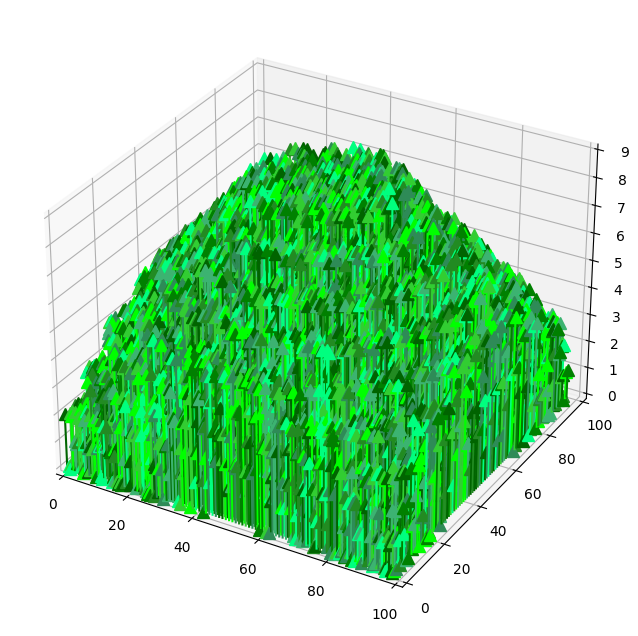

In [28]:
import mpl_toolkits.mplot3d.art3d as art3d
import random

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

greens = [
    "forestgreen",
    "limegreen",
    "darkgreen",
    "green",
    "lime",
    "seagreen",
    "mediumseagreen",
    "springgreen"
]

for i in range(grid.shape[1]):
    for j in range(grid.shape[0]):
        line = art3d.Line3D(*zip((i,j,0), (i,j,grid[j][i])),                    
                            marker='^', markevery=(1,1), 
                            markersize=8, color=random.choice(greens))
        ax.add_line(line)

ax.set_xlim3d(0,grid.shape[1]+1)
ax.set_ylim3d(0,grid.shape[0]+1)
ax.set_zlim3d(0,np.amax(grid))   
#ax.axis('off')

plt.show()

In [5]:
def computeViewDistance(h,los):
    vd = 0
    for t in los:
        vd += 1
        if t>=h:
            break
    return vd

def scenicScore(i,j,grid):
    vdT = computeViewDistance( grid[j][i], np.flip(grid[   :j,i],0) ) # flip order for line-of-sight
    vdB = computeViewDistance( grid[j][i],         grid[j+1: ,i]    )
    vdL = computeViewDistance( grid[j][i], np.flip(grid[j,   :i],0) ) # flip order for line-of-sight
    vdR = computeViewDistance( grid[j][i],         grid[j,i+1: ]    )
    return vdT*vdB*vdL*vdR

def highestScenicScore(grid):
    score = np.zeros(grid.shape,int)
    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            score[j][i] = scenicScore(i,j,grid)
    return np.amax(score),score

In [6]:
print("Test 2:",highestScenicScore(grid0)[0])
sol2,score=highestScenicScore(grid)
print("Part 2:",sol2)

Test 2: 8
Part 2: 405769


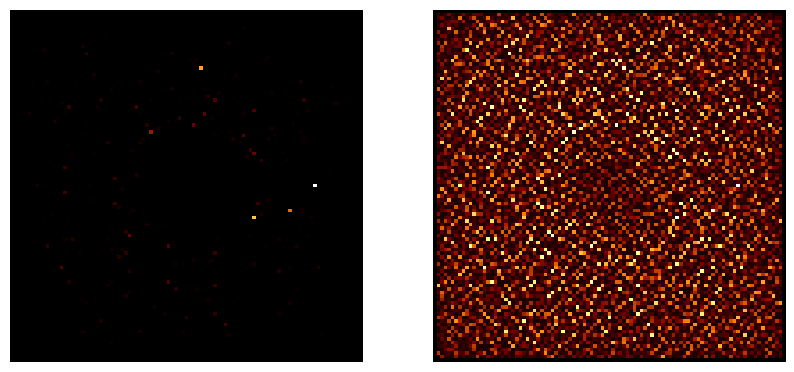

In [7]:
fix, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].axis('off')
_ = ax[0].imshow(score,cmap="afmhot")

ax[1].axis('off')
_ = ax[1].imshow(np.log(score+1),cmap="afmhot")

Generatig animation... Saving animation... Animation saved.


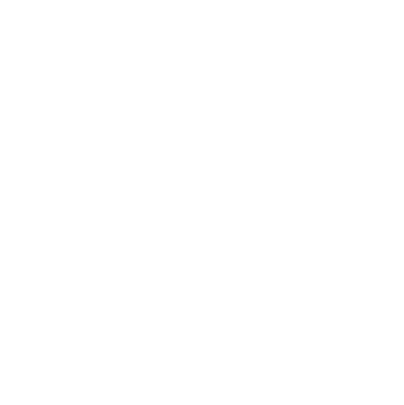

In [8]:
from celluloid import Camera

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.axis('off')

print("Generatig animation... ",end="")

camera = Camera(fig)
plt.imshow(grid,cmap="summer")
plt.axis('off')
camera.snap()

s = 0
while s<=np.amax(score):
    # make evolving mask from array of scenic scores
    mask = np.where(score>s,1,0)
    mask = np.ma.masked_where(mask<1,mask)
    ax.text(0.5, -1.5, "scenic score > {}".format(s)),
    plt.imshow(grid,cmap="summer")
    plt.imshow(mask,cmap="gray")
    plt.axis('off')
    camera.snap()
    s += 10**(len(str((s)))-1) # pseudo-log spacing

print("Saving animation... ",end="")

anim = camera.animate(blit=False)

anim.save('visualisation/day8animation2.gif', writer='imagemagick')

print("Animation saved.")    

![Views](./visualisation/day8animation2.gif)